In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-data-set/HR_capstone_dataset.csv


# Data Visualization Libraries

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt



In [65]:
df=pd.read_csv("/kaggle/input/hr-analytics-data-set/HR_capstone_dataset.csv")

In [66]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [67]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [69]:
df["Department"].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [70]:
df["salary"].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [71]:
df["promotion_last_5years"].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [72]:
df["left"].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

# Eda Analysis

## **Top counts from departments**

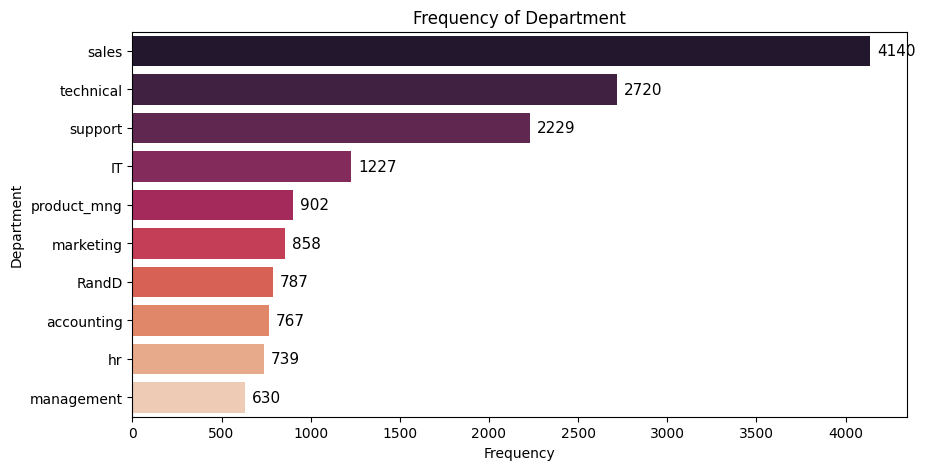

In [73]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data=df, y='Department', order=df['Department'].value_counts().index,palette="rocket")  
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=11, color='black', xytext=(5, 0),
                textcoords='offset points')


plt.xlabel('Frequency')  
plt.ylabel('Department')
plt.title('Frequency of Department')  
plt.show() 

## **Examining whether there is a direct relationship between turnover and other variables**

In [74]:
df_left_statistic=df[df["left"]==1]
df_left_statistic.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Figure size 5000x5000 with 0 Axes>

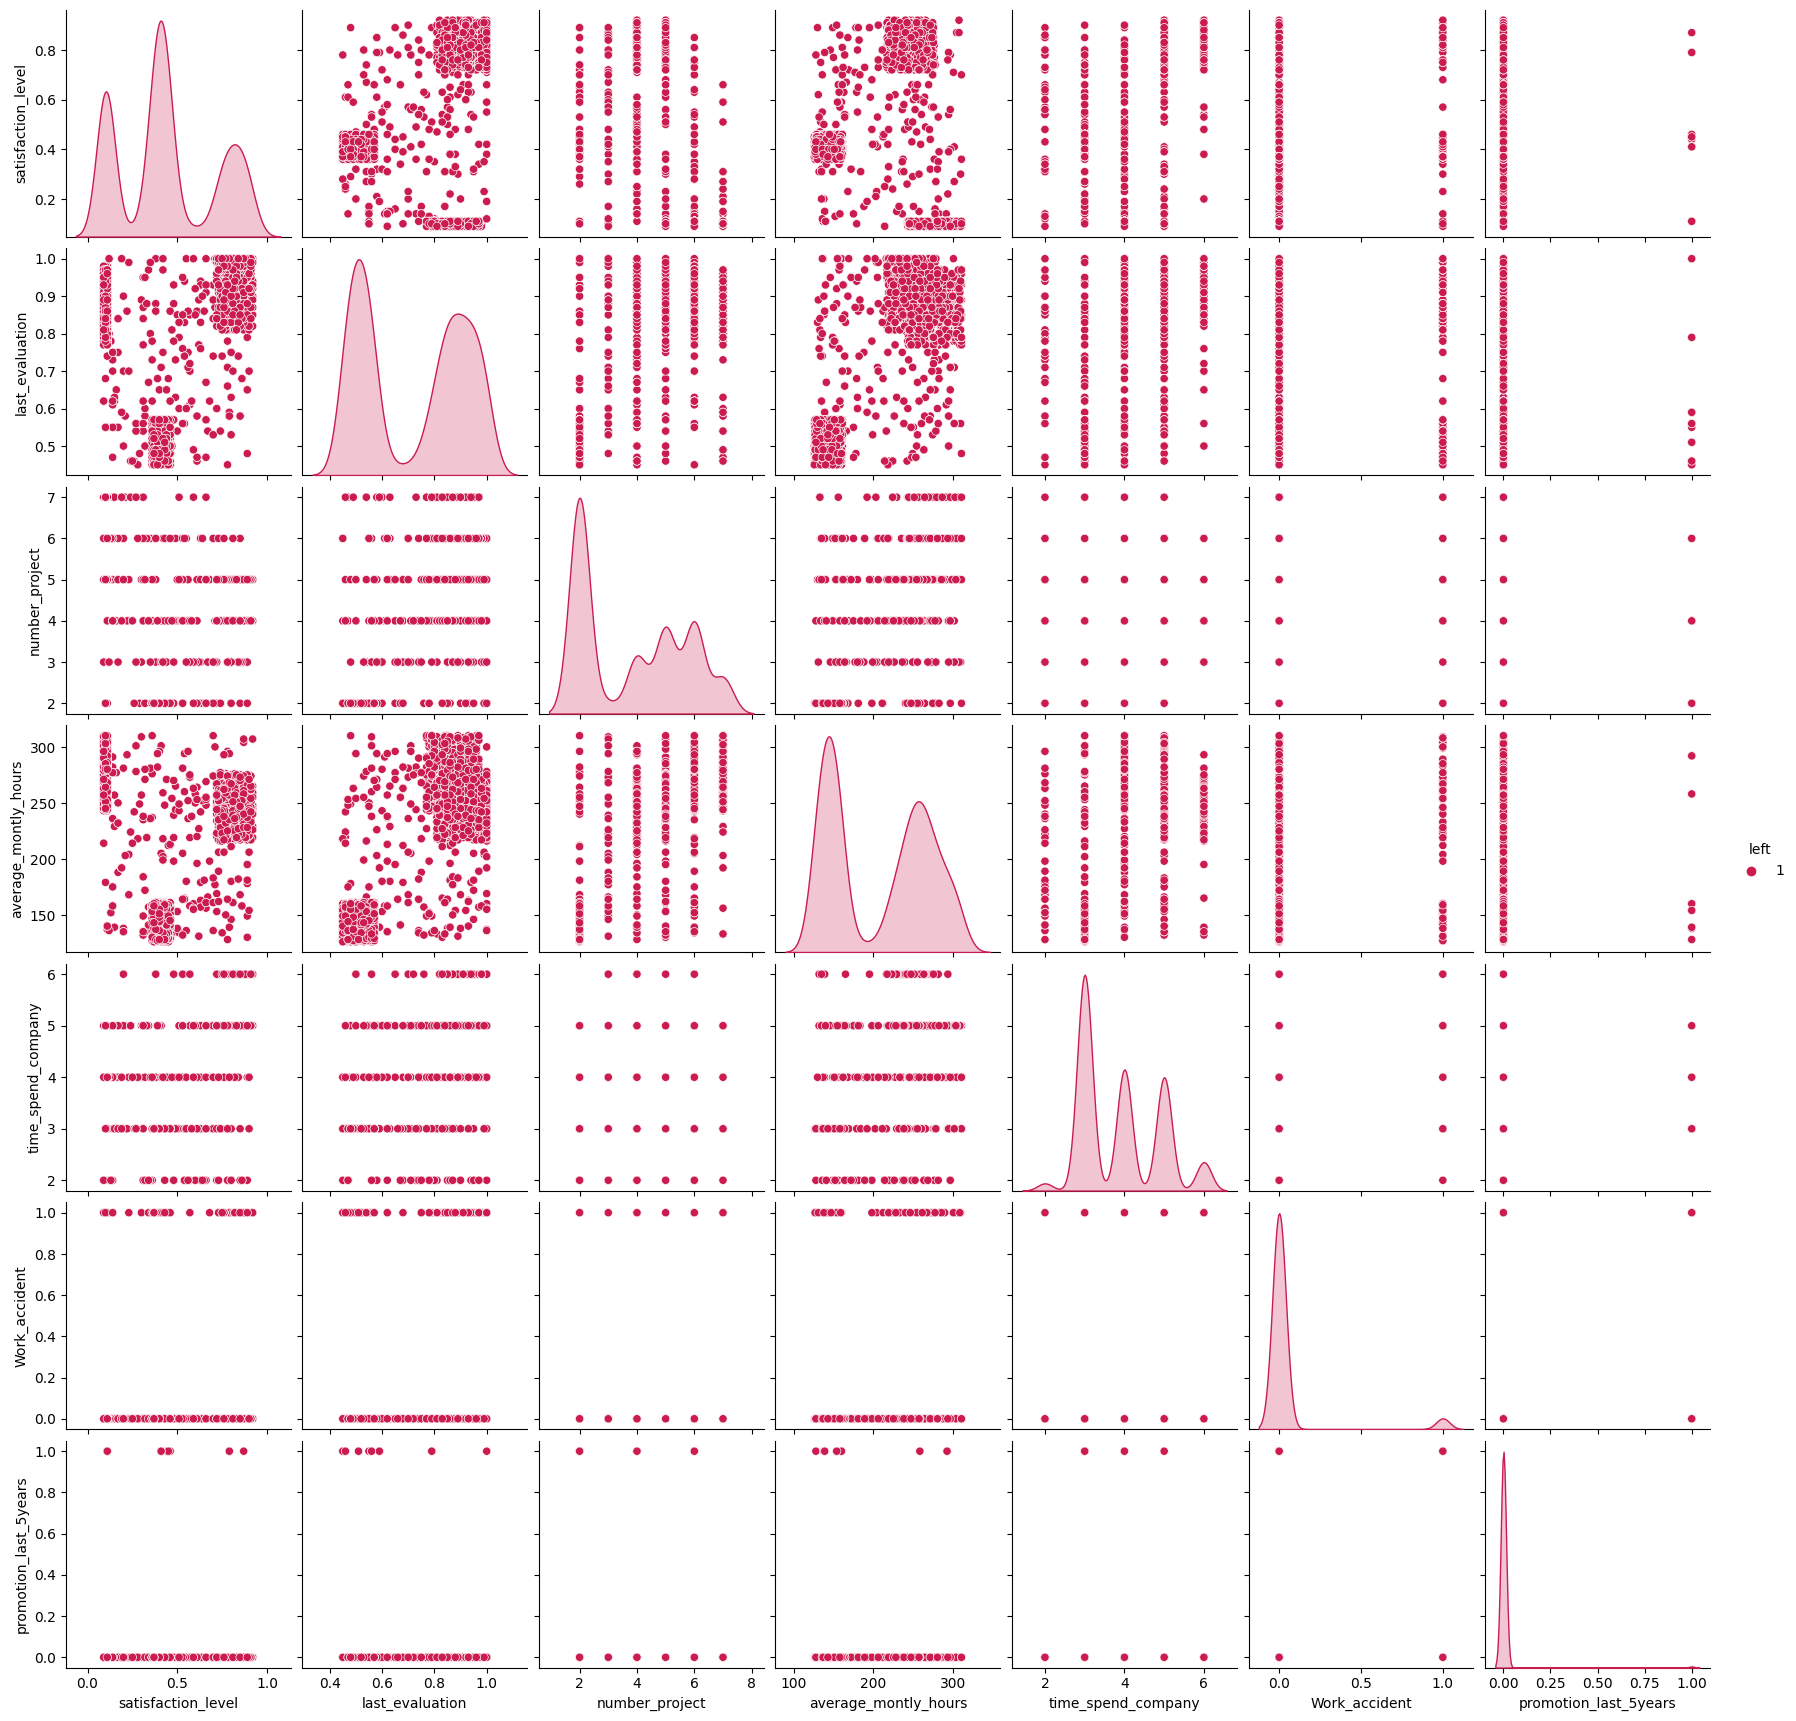

In [75]:
plt.figure(figsize=(50,50))
sns.pairplot(df_left_statistic, hue="left",palette="rocket")
plt.show();

In [76]:
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [77]:
# Countplot graphic
def countplot_left(col):
    plt.figure(figsize=(12,6))
    ax=sns.countplot(data=df, x=col,hue="left",palette="rocket")

    for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points'),
    plt.xlabel(f"{col.upper()}",fontsize=14)
    plt.ylabel("COUNT",fontsize=14)
    plt.title(f"{col.upper()}-WORK LEAVE STATISTIC")
    plt.show()

## **SALARY-WORK LEAVE STATISTIC**

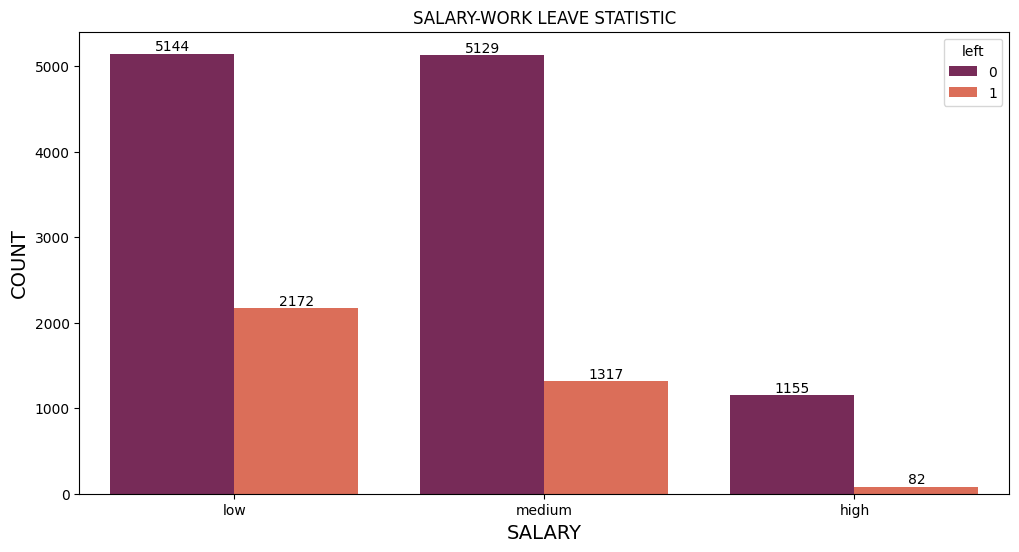

In [78]:
countplot_left("salary")

## **DEPARTMENT- WORK LEAVE STATISTIC**

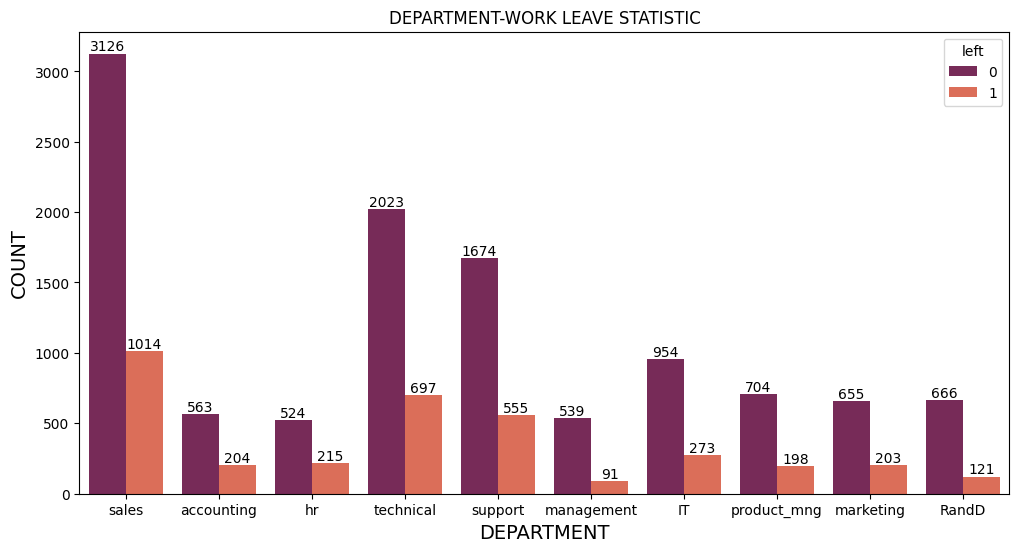

In [79]:
countplot_left("Department")

## **SALARY-AVARAGE HOURS-STATISTIC**

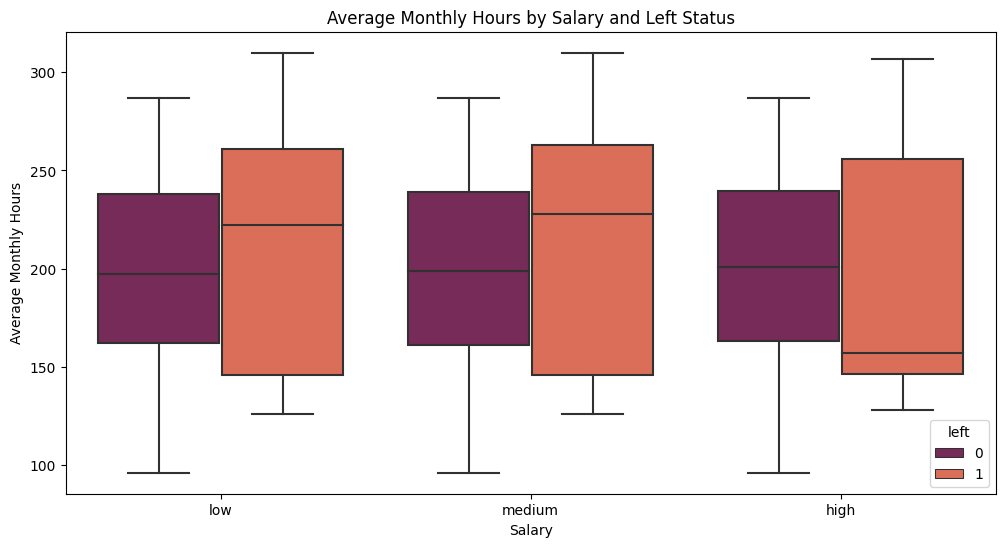

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="salary", y="average_montly_hours", hue="left",palette="rocket")
plt.title("Average Monthly Hours by Salary and Left Status")
plt.xlabel("Salary")
plt.ylabel("Average Monthly Hours")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 1200x600 with 0 Axes>

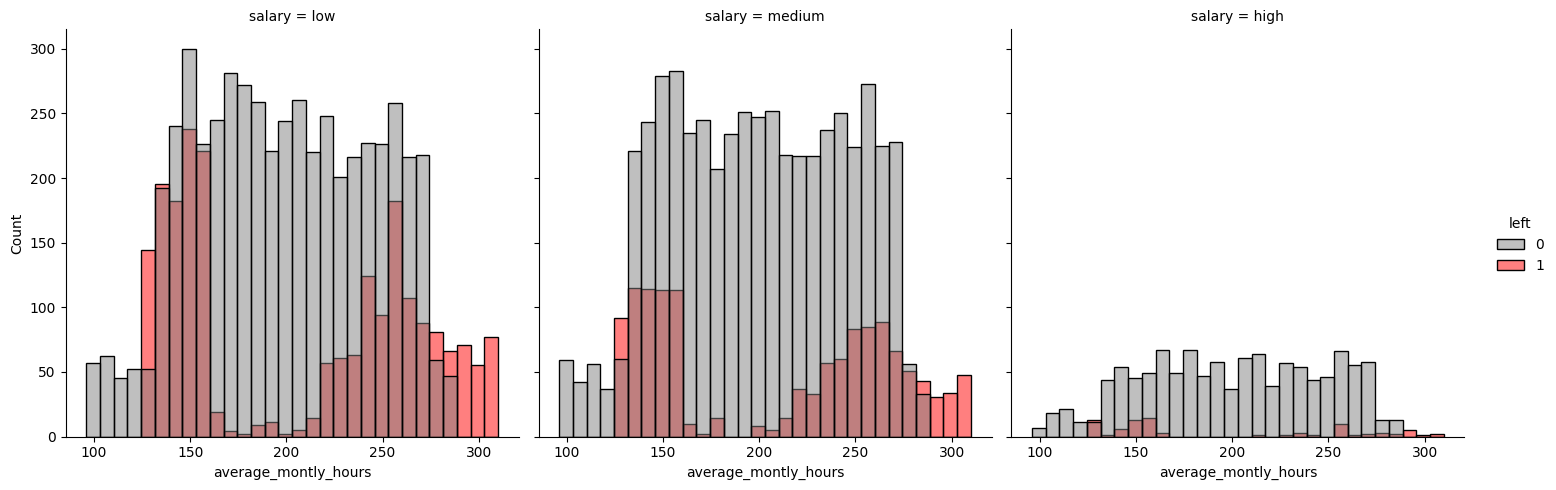

In [81]:
plt.figure(figsize=(12, 6))
sns.displot(data=df, x="average_montly_hours", col="salary", hue="left",palette=["gray","red"])
plt.show();

In [82]:
'''Satisfaction Level (Memnuniyet Düzeyi): Çalışanların işlerinden ne kadar memnun olduklarını ölçen bir ölçektir. Genellikle 0 ile 1 arasında bir değer alır.

Last Evaluation (Son Değerlendirme): Çalışanların en son performans değerlendirmesi sonucunu belirtir. Bu genellikle 0 ile 1 arasında bir değer alır.

Number of Project (Proje Sayısı): Çalışanın aynı anda üstlendiği proje sayısını belirtir.

Average Monthly Hours (Aylık Ortalama Çalışma Saati): Çalışanların ortalama olarak ayda kaç saat çalıştığını belirtir.

Time Spend Company (Şirkette Geçirilen Zaman): Çalışanın şirkette ne kadar süredir çalıştığını belirtir.

Work Accident (İş Kazası): Çalışanın iş kazası geçirip geçirmediğini belirtir. 1 iş kazası geçirdiyse, 0 ise geçirmedi.

Left (Ayrılan): Çalışanın şirketten ayrılıp ayrılmadığını belirtir. 1 ayrıldıysa, 0 ise ayrılmadı.

Promotion Last 5 Years (Son 5 Yılda Terfi): Çalışanın son beş yıl içinde terfi alıp almadığını belirtir. 1 terfi aldıysa, 0 ise almadı.

Department (Departman): Çalışanın bağlı olduğu departmanı belirtir.

Salary (Maaş): Çalışanın maaş düzeyini belirtir. "low" (düşük), "medium" (orta) veya "high" (yüksek) olabilir.'''

'Satisfaction Level (Memnuniyet Düzeyi): Çalışanların işlerinden ne kadar memnun olduklarını ölçen bir ölçektir. Genellikle 0 ile 1 arasında bir değer alır.\n\nLast Evaluation (Son Değerlendirme): Çalışanların en son performans değerlendirmesi sonucunu belirtir. Bu genellikle 0 ile 1 arasında bir değer alır.\n\nNumber of Project (Proje Sayısı): Çalışanın aynı anda üstlendiği proje sayısını belirtir.\n\nAverage Monthly Hours (Aylık Ortalama Çalışma Saati): Çalışanların ortalama olarak ayda kaç saat çalıştığını belirtir.\n\nTime Spend Company (Şirkette Geçirilen Zaman): Çalışanın şirkette ne kadar süredir çalıştığını belirtir.\n\nWork Accident (İş Kazası): Çalışanın iş kazası geçirip geçirmediğini belirtir. 1 iş kazası geçirdiyse, 0 ise geçirmedi.\n\nLeft (Ayrılan): Çalışanın şirketten ayrılıp ayrılmadığını belirtir. 1 ayrıldıysa, 0 ise ayrılmadı.\n\nPromotion Last 5 Years (Son 5 Yılda Terfi): Çalışanın son beş yıl içinde terfi alıp almadığını belirtir. 1 terfi aldıysa, 0 ise almadı.\n\n

In [83]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## **NUMBER PROJECT - WORK LEAVE STATISTIC**

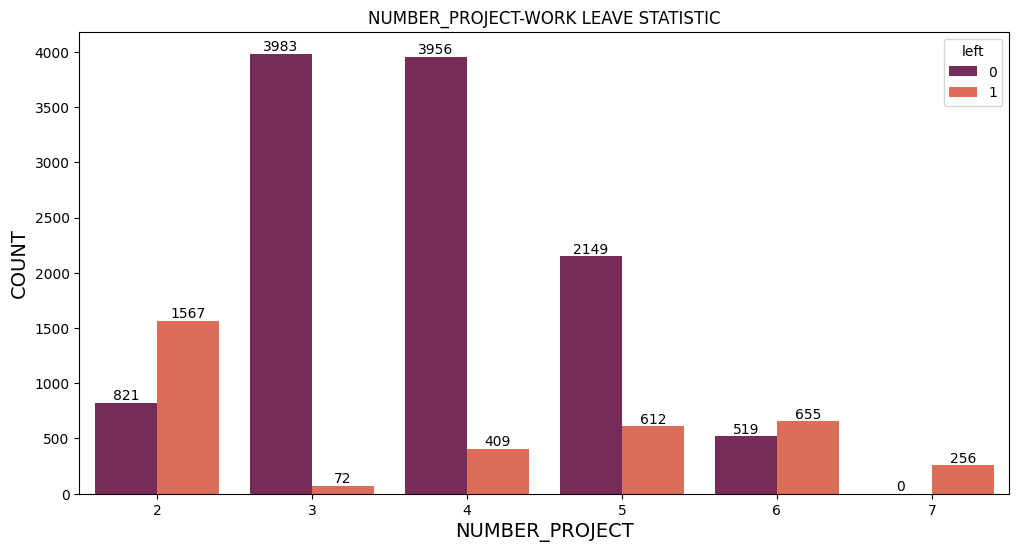

In [84]:
countplot_left("number_project")

## **WORK ACCIDENT - WORK LEAVE STATISTIC**

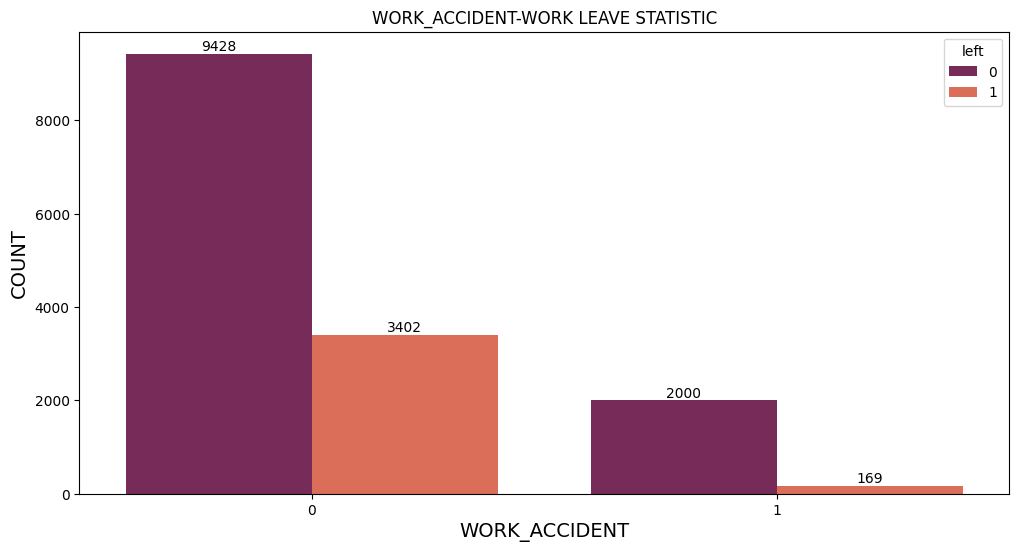

In [85]:
countplot_left("Work_accident")

## **TIME SPEND IN COMPANY - WORK LEAVE STATISTIC**

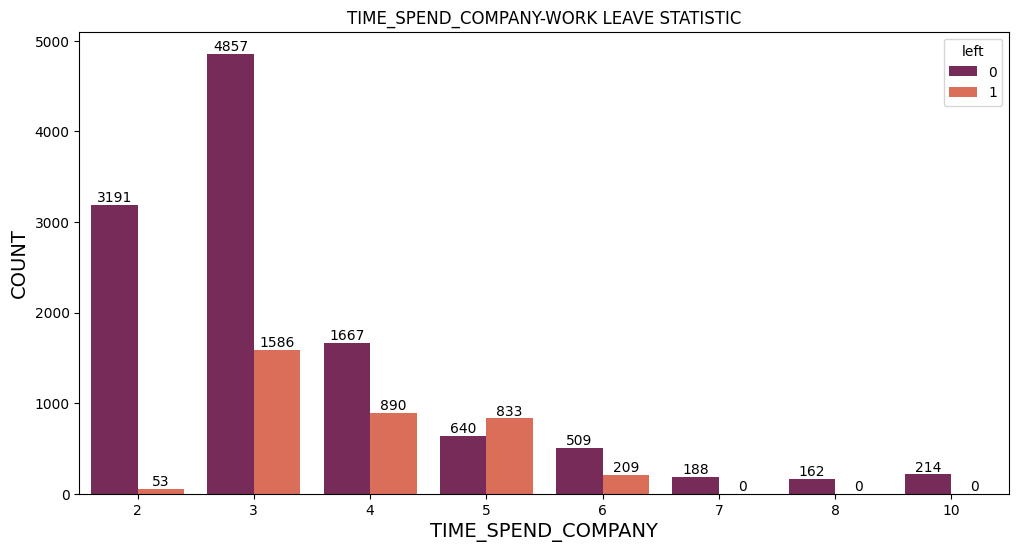

In [86]:
countplot_left("time_spend_company")

In [87]:
df_hr=df.copy()

In [88]:
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [89]:

plot_train=df_hr.drop(["Department","salary","Work_accident","left","promotion_last_5years"],axis=1)


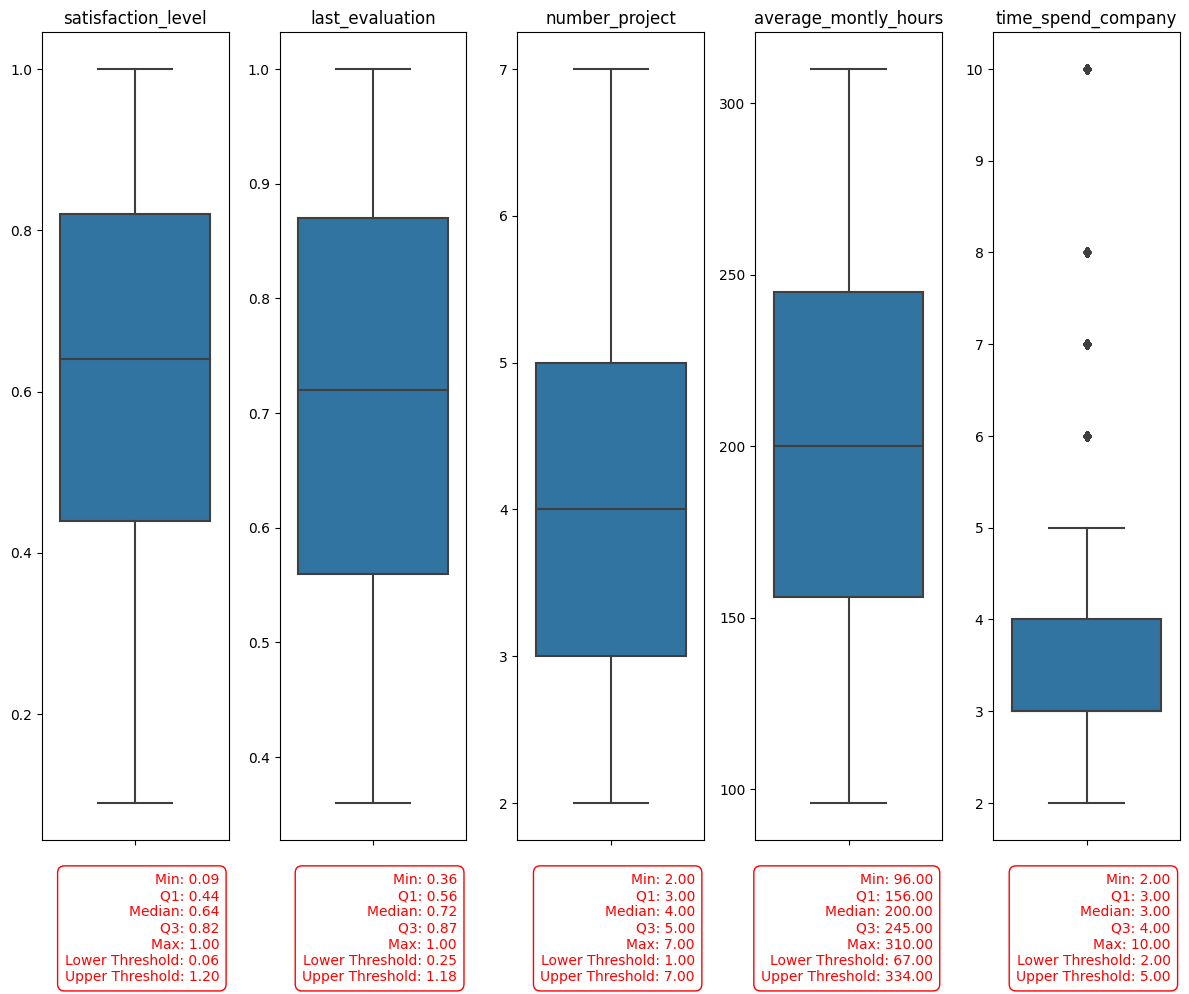

In [90]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(plot_train.columns):
    plt.subplot(1, len(plot_train.columns), i + 1)
    sns.boxplot(y=plot_train[column])
    plt.title(column)
    plt.ylabel(None)  

    stats = plot_train[column].describe()
    iqr = stats['75%'] - stats['25%']
    lower_threshold = stats['25%'] - iqr
    upper_threshold = stats['75%'] + iqr
    stats_str = f"Min: {stats['min']:.2f}\nQ1: {stats['25%']:.2f}\nMedian: {stats['50%']:.2f}\nQ3: {stats['75%']:.2f}\nMax: {stats['max']:.2f}\nLower Threshold: {lower_threshold:.2f}\nUpper Threshold: {upper_threshold:.2f}"

    plt.text(0.95, -0.11, stats_str, verticalalignment='center', horizontalalignment='right',
             transform=plt.gca().transAxes, color='red', fontsize=10, bbox=dict(facecolor='none', edgecolor='red', boxstyle='round,pad=0.5'))

plt.tight_layout()


plt.show()

In [91]:
threshold_1=5
df_hr.drop(df_hr[df_hr['time_spend_company'] > threshold_1].index, axis=0, inplace=True)


## **Encoding** 

In [92]:
df_hr["salary"].value_counts()

salary
low       6831
medium    5824
high      1062
Name: count, dtype: int64

In [93]:
# Salary is a ordinal value
df_hr['salary'] = df_hr['salary'].map({'low': 0, 'medium': 1.0,'high':2.0})


### One Hot Encode

In [94]:

encoded_dep = pd.get_dummies(df_hr['Department'], prefix='Department',dtype=int)
df_hr= pd.concat([df_hr, encoded_dep], axis=1)


In [95]:
df_hr.drop(columns="Department",axis=1,inplace=True)
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0.0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0.0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0.0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0.0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0.0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0.0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0.0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0.0,0,0,0,0,0,0,0,0,1,0


In [96]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13717 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      13717 non-null  float64
 1   last_evaluation         13717 non-null  float64
 2   number_project          13717 non-null  int64  
 3   average_montly_hours    13717 non-null  int64  
 4   time_spend_company      13717 non-null  int64  
 5   Work_accident           13717 non-null  int64  
 6   left                    13717 non-null  int64  
 7   promotion_last_5years   13717 non-null  int64  
 8   salary                  13717 non-null  float64
 9   Department_IT           13717 non-null  int64  
 10  Department_RandD        13717 non-null  int64  
 11  Department_accounting   13717 non-null  int64  
 12  Department_hr           13717 non-null  int64  
 13  Department_management   13717 non-null  int64  
 14  Department_marketing    13717 non-null  int

# **Corelation Matris**

In [97]:
 Correlation_matris=df_hr.corr()

In [98]:
 Correlation_matris

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
satisfaction_level,1.000000,0.103088,-0.146967,-0.032129,-0.210165,0.063434,-0.444273,0.034254,0.063052,0.006037,0.018971,-0.031510,-0.013057,0.003056,0.010509,0.005481,0.000269,0.006839,-0.007580
last_evaluation,0.103088,1.000000,0.364904,0.346839,0.197168,0.003159,-0.026146,-0.001568,-0.005996,0.007655,-0.001344,-0.003253,-0.010822,0.012860,-0.002455,-0.004412,-0.019618,0.013162,0.011655
number_project,-0.146967,0.364904,1.000000,0.438488,0.299356,-0.004172,0.012697,0.000918,-0.001598,0.007144,0.007396,0.006454,-0.026495,0.016723,-0.025313,-0.001881,-0.017256,0.002214,0.027753
average_montly_hours,-0.032129,0.346839,0.438488,1.000000,0.202412,-0.002665,0.053215,-0.006497,-0.000216,0.011538,0.000132,-0.000422,-0.015036,0.005565,-0.008468,-0.005242,-0.007119,-0.005284,0.019050
time_spend_company,-0.210165,0.197168,0.299356,0.202412,1.000000,-0.050140,0.363662,-0.015010,-0.053251,0.006331,-0.002867,0.018356,-0.001453,-0.007524,-0.004890,-0.002089,-0.008247,-0.008024,0.012126
Work_accident,0.063434,0.003159,-0.004172,-0.002665,-0.050140,1.000000,-0.154103,0.036719,0.008531,-0.010597,0.017590,-0.007355,-0.015259,-0.001230,0.007923,0.002562,-0.002044,0.008298,-0.000863
left,-0.444273,-0.026146,0.012697,0.053215,0.363662,-0.154103,1.000000,-0.051478,-0.145250,-0.007792,-0.048277,0.016419,0.025084,-0.028005,-0.001846,-0.015448,0.018871,-0.001555,0.013724
promotion_last_5years,0.034254,-0.001568,0.000918,-0.006497,-0.015010,0.036719,-0.051478,1.000000,0.072168,-0.034069,0.032444,-0.013679,-0.012976,0.067426,0.052374,-0.033801,0.026947,-0.027007,-0.027829
salary,0.063052,-0.005996,-0.001598,-0.000216,-0.053251,0.008531,-0.145250,0.072168,1.000000,-0.005365,0.007241,0.012206,0.005823,0.108628,0.016475,-0.007368,-0.038765,-0.017819,-0.006762
Department_IT,0.006037,0.007655,0.007144,0.011538,0.006331,-0.010597,-0.007792,-0.034069,-0.005365,1.000000,-0.071534,-0.070344,-0.069295,-0.057741,-0.073064,-0.076149,-0.184033,-0.127174,-0.143316


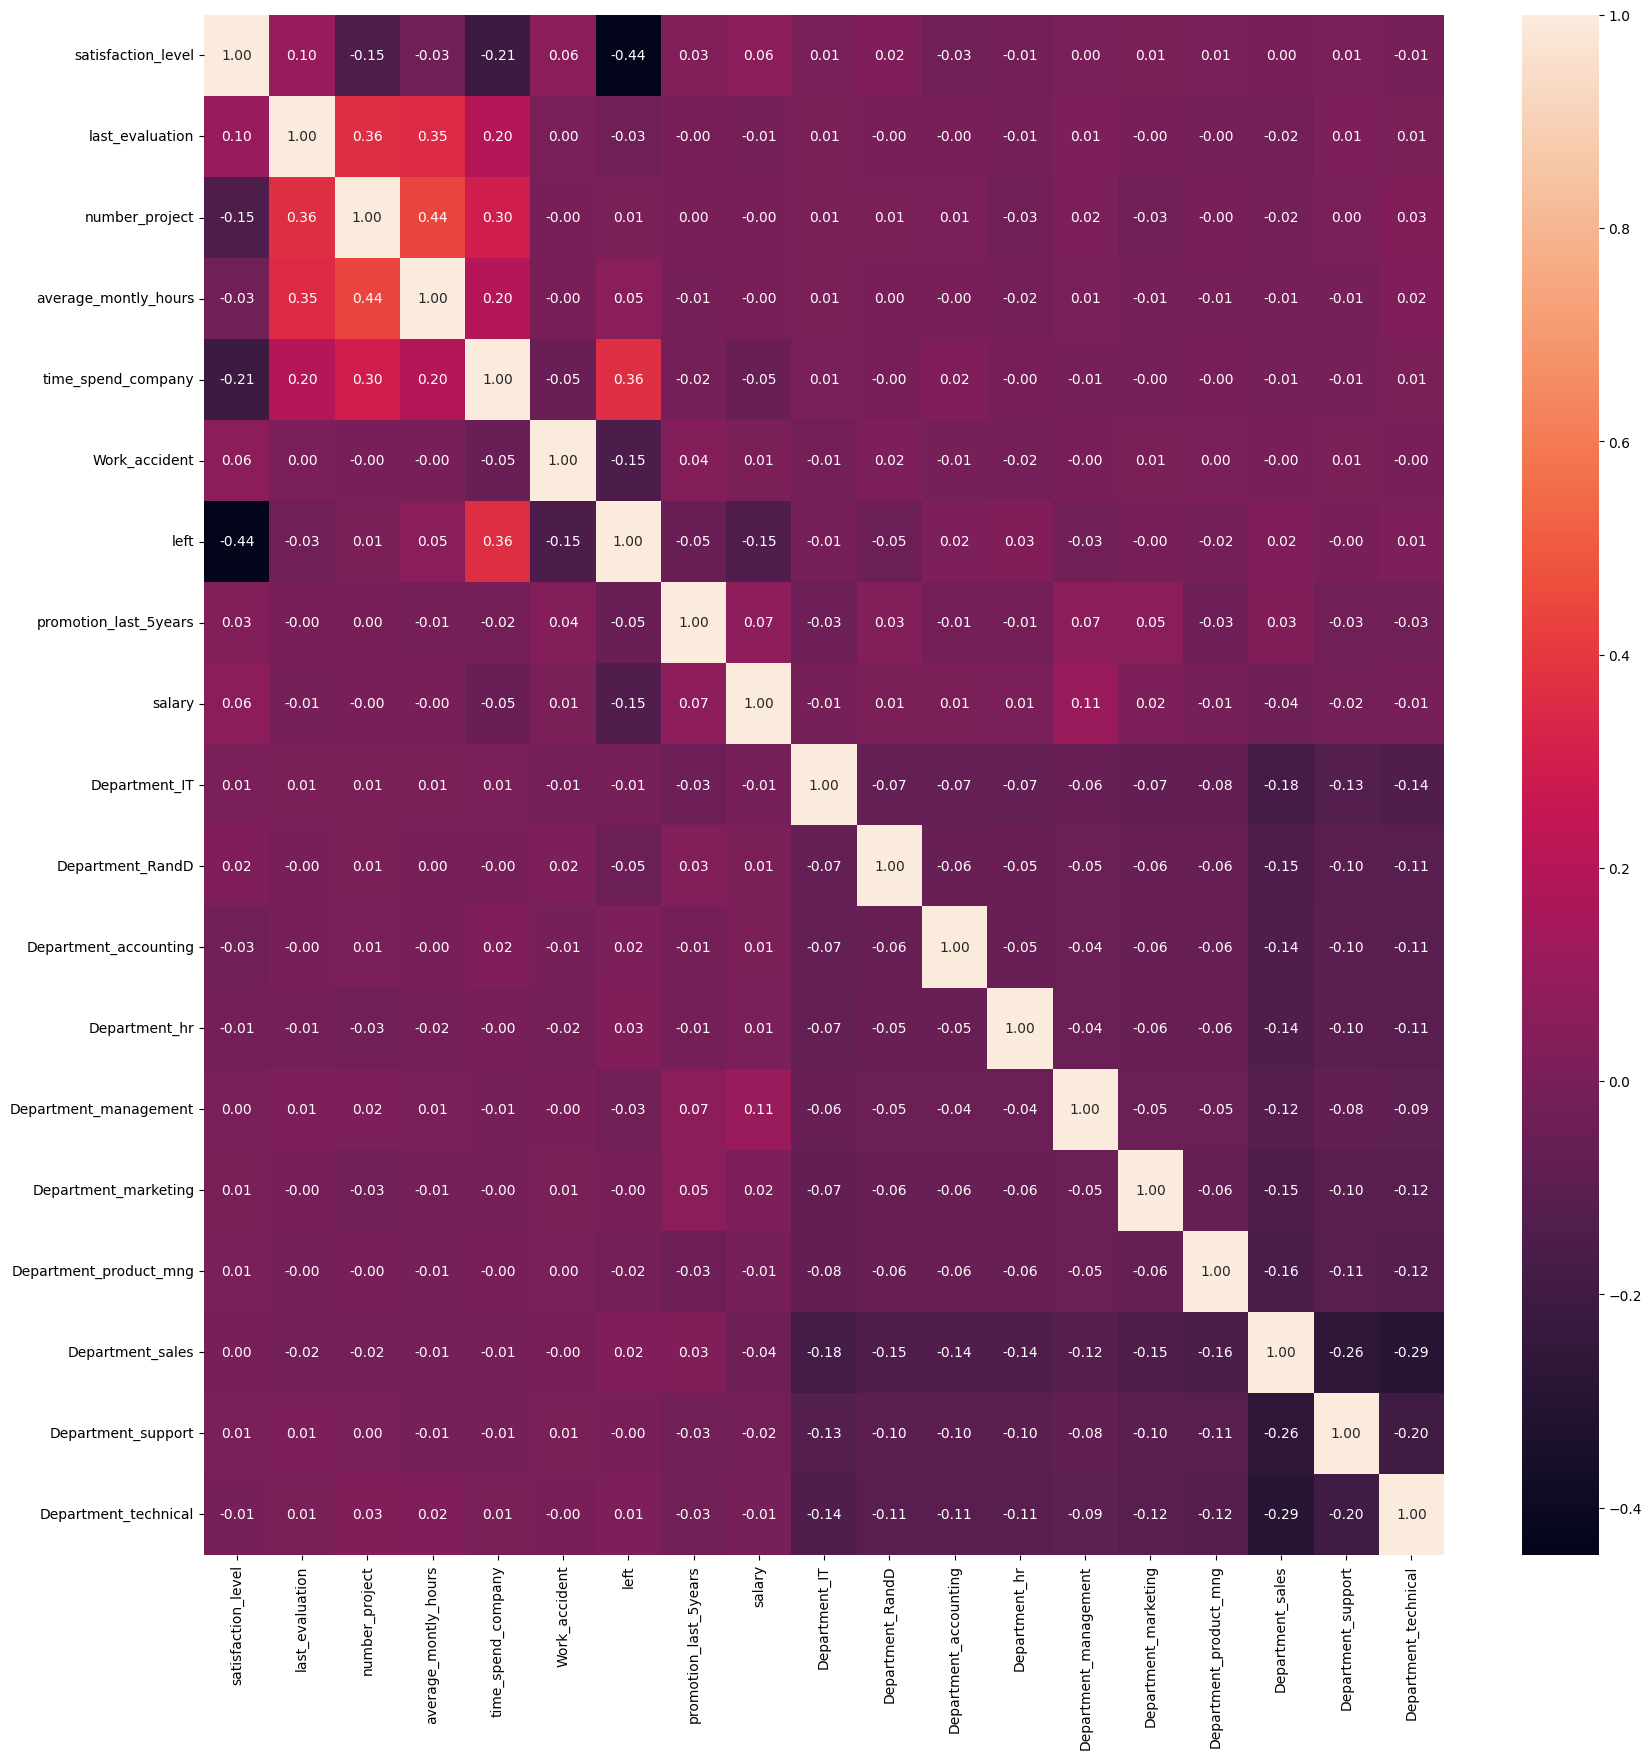

In [99]:

plt.figure(figsize=(20,20))
sns.heatmap(data=Correlation_matris,annot=True,cmap='rocket', fmt=".2f")
plt.show();

# Model import

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier ,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,StackingClassifier,VotingClassifier


In [134]:
# RMSE Function
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [103]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13717 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      13717 non-null  float64
 1   last_evaluation         13717 non-null  float64
 2   number_project          13717 non-null  int64  
 3   average_montly_hours    13717 non-null  int64  
 4   time_spend_company      13717 non-null  int64  
 5   Work_accident           13717 non-null  int64  
 6   left                    13717 non-null  int64  
 7   promotion_last_5years   13717 non-null  int64  
 8   salary                  13717 non-null  float64
 9   Department_IT           13717 non-null  int64  
 10  Department_RandD        13717 non-null  int64  
 11  Department_accounting   13717 non-null  int64  
 12  Department_hr           13717 non-null  int64  
 13  Department_management   13717 non-null  int64  
 14  Department_marketing    13717 non-null  int

In [104]:
# TRAIN TEST SPLIT 
features=df_hr.drop(columns="left",axis=1)
X=features
y=df_hr["left"]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,y,test_size=0.2,random_state=42)

# Classifier Models

In [137]:
Classifier_model = [RandomForestClassifier(), AdaBoostClassifier(), BaggingClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), HistGradientBoostingClassifier()]
dfs = {}

# Her bir sınıflandırıcıyı eğitme ve test etme
for i, clf in enumerate(Classifier_model):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_valid)
    accuracy = rmse(Y_valid, y_pred)
    print(f"{clf.__class__.__name__} accuracy: {accuracy:.4f}")

    # Sözlüğe sınıflandırıcıların tahminlerini ekleyin
    dfs[f'df_comparison_{i}'] = pd.DataFrame({'Gerçek Değerler': Y_valid, 'Tahmin Edilen Değerler': y_pred})

# Sözlükteki tüm DataFrame'leri yazdırın
for key, df in dfs.items():
    print(key)
    print(df)

RandomForestClassifier accuracy: 0.1080
AdaBoostClassifier accuracy: 0.1965
BaggingClassifier accuracy: 0.1161
ExtraTreesClassifier accuracy: 0.1177
GradientBoostingClassifier accuracy: 0.1631
HistGradientBoostingClassifier accuracy: 0.1207
df_comparison_0
       Gerçek Değerler  Tahmin Edilen Değerler
4912                 0                       0
6950                 0                       0
7618                 0                       0
10010                0                       0
12222                1                       1
...                ...                     ...
46                   1                       1
19                   1                       1
3857                 0                       0
8742                 0                       0
1992                 1                       1

[2744 rows x 2 columns]
df_comparison_1
       Gerçek Değerler  Tahmin Edilen Değerler
4912                 0                       0
6950                 0                      